In [47]:
#Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Suppress convergence warning
warnings.filterwarnings("ignore", category=UserWarning)

In [49]:
# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

In [50]:
# Imputation
print("\n--- Dataset Metadata and Preview ---")
print("Shape:", titanic_data.shape)
print("Columns:", list(titanic_data.columns))
print(titanic_data.head())


--- Dataset Metadata and Preview ---
Shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [51]:
# Check missing values
print("\n--- Missing Values Summary ---")
print(titanic_data.isnull().sum())
print("\nMissing Values %:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


--- Missing Values Summary ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values %:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


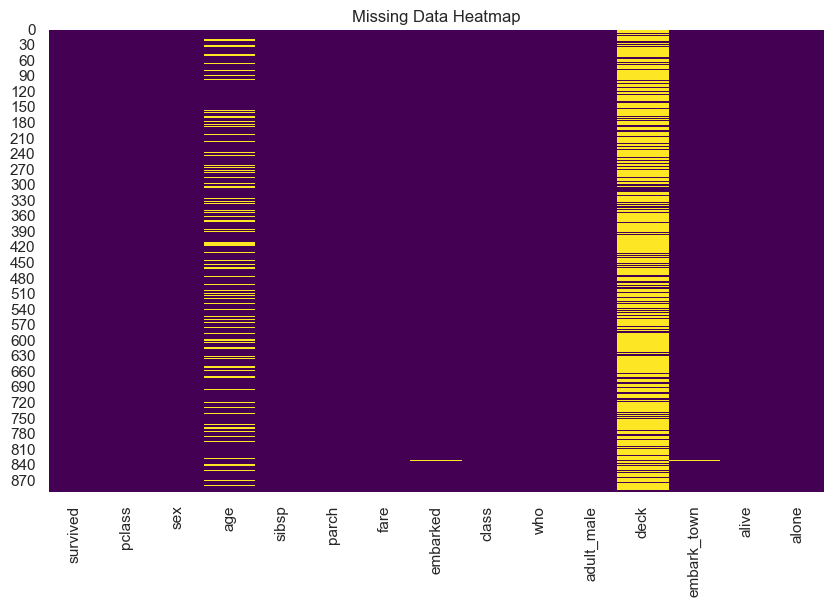

In [52]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [53]:
# Impute missing values
print("\n--- Imputing Missing Values ---")
titanic_data_filled = titanic_data.copy()
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0, max_iter=20)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

print("\nPost-imputation missing values:")
print(titanic_data_filled.isnull().sum())


--- Imputing Missing Values ---

Post-imputation missing values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64



--- Univariate Analysis ---


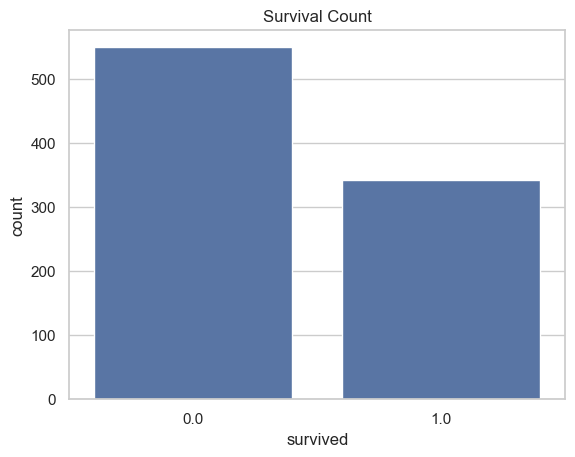

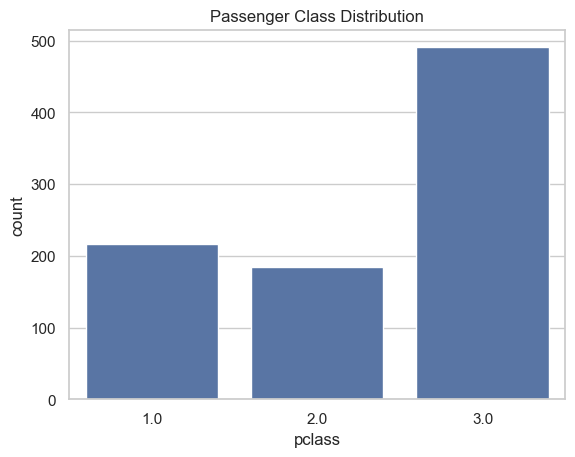

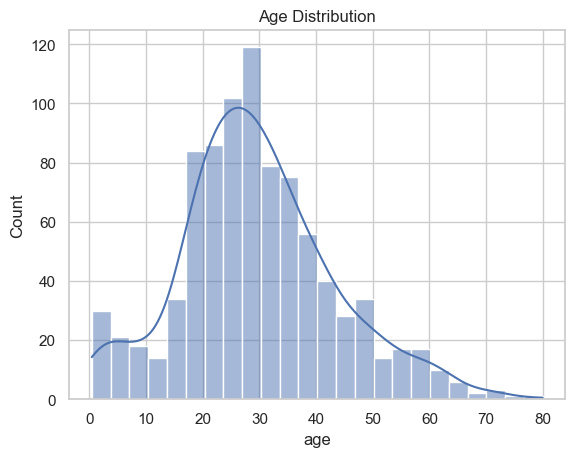

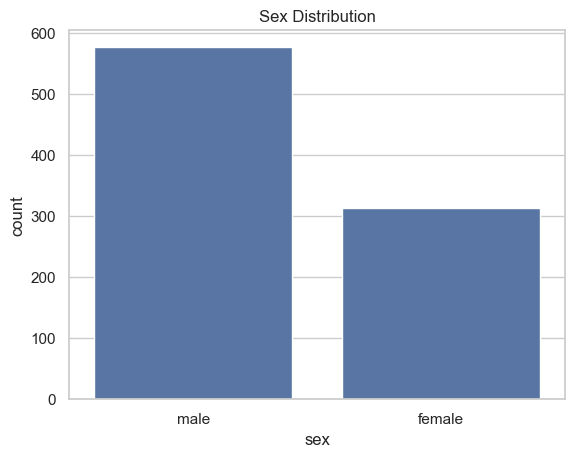

In [54]:
# Univariate Analysis
print("\n--- Univariate Analysis ---")
sns.countplot(x='survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()

sns.countplot(x='pclass', data=titanic_data_filled)
plt.title('Passenger Class Distribution')
plt.show()

sns.histplot(x='age', data=titanic_data_filled, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='sex', data=titanic_data_filled)
plt.title('Sex Distribution')
plt.show()


--- Bivariate Analysis ---


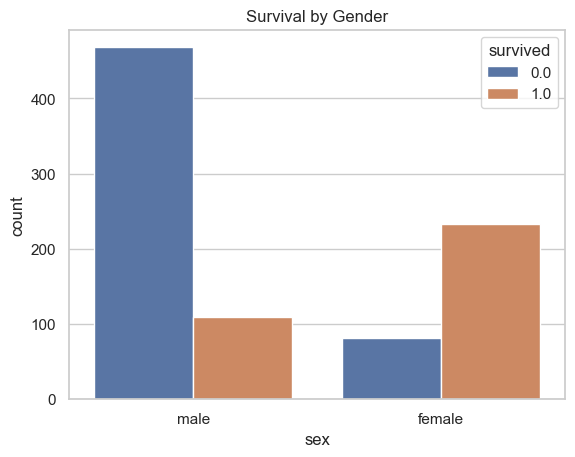

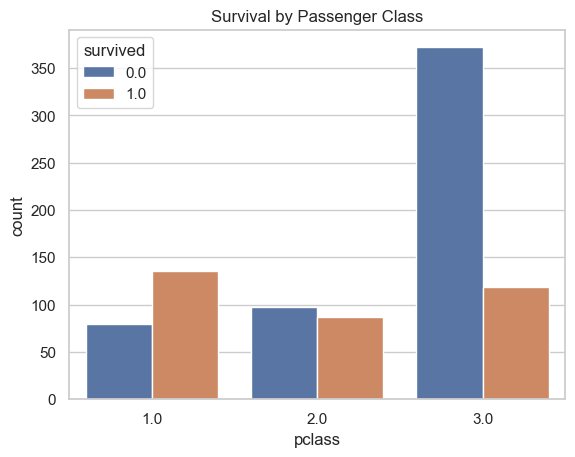

In [55]:
# Bivariate Analysis
print("\n--- Bivariate Analysis ---")
sns.countplot(x='sex', hue='survived', data=titanic_data_filled)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='pclass', hue='survived', data=titanic_data_filled)
plt.title('Survival by Passenger Class')
plt.show()

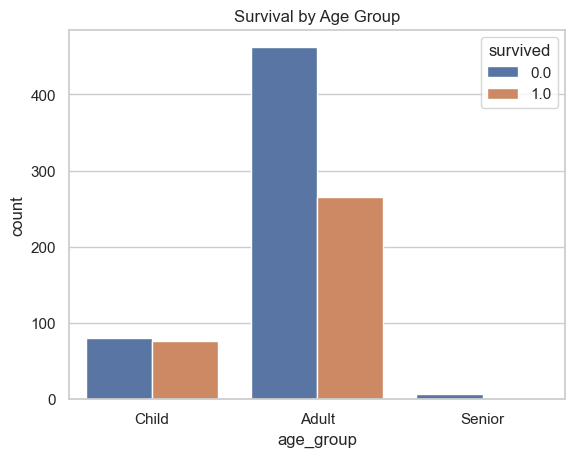

In [56]:
# Age bins
age_bins = [0, 18, 65, 100]
age_labels = ['Child', 'Adult', 'Senior']
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=age_bins, labels=age_labels)

sns.countplot(x='age_group', hue='survived', data=titanic_data_filled)
plt.title('Survival by Age Group')
plt.show()

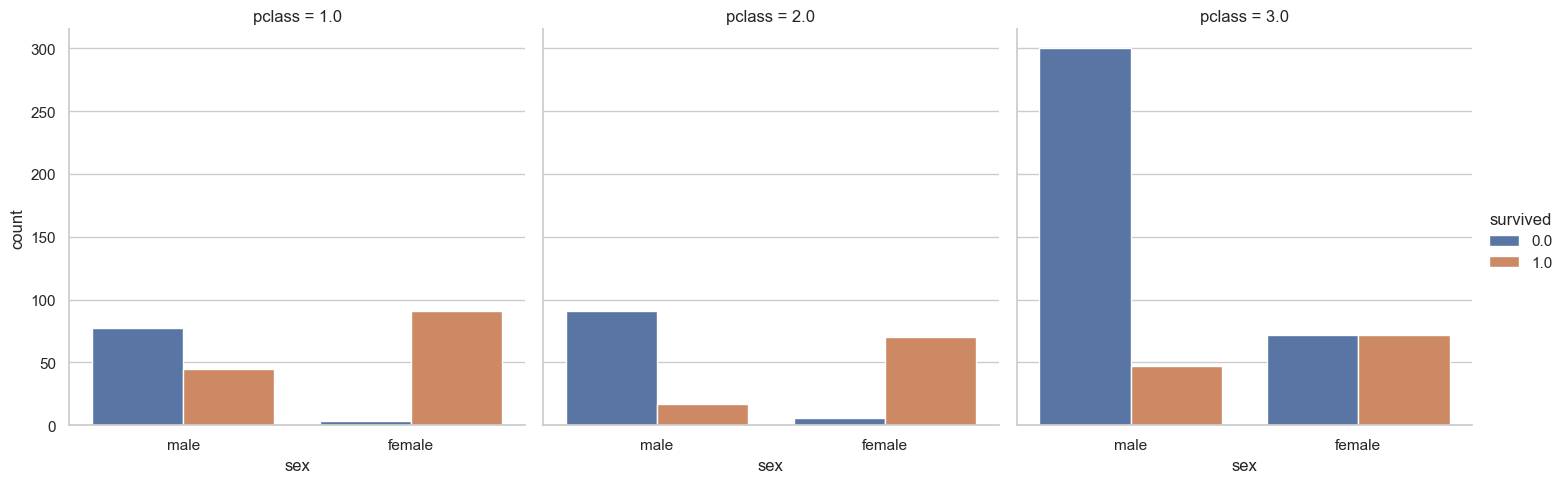

In [57]:
# Survival by gender and class
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_data_filled)
plt.show()


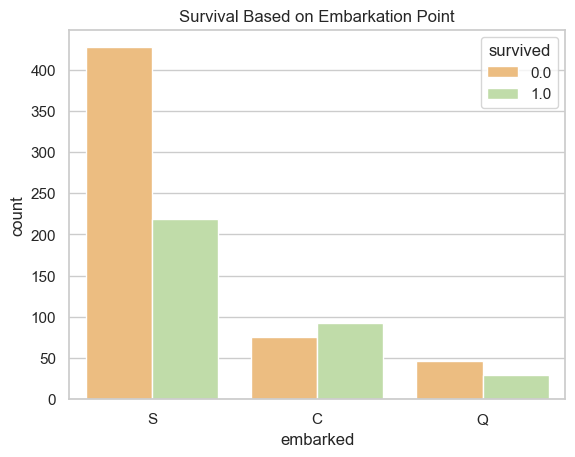

In [58]:
# Embarkation and Survival
sns.countplot(x='embarked', hue='survived', data=titanic_data_filled, palette='Spectral')
plt.title('Survival Based on Embarkation Point')
plt.show()

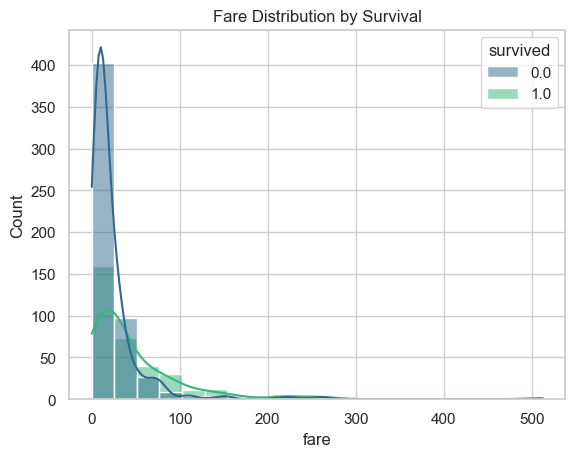

In [59]:
# Fare vs survival
sns.histplot(titanic_data_filled, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.show()

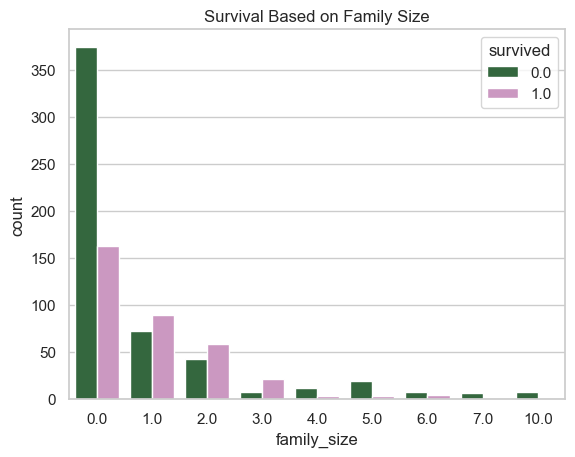

In [60]:
# Family size
titanic_data_filled['family_size'] = titanic_data_filled['sibsp'] + titanic_data_filled['parch']
sns.countplot(x='family_size', hue='survived', data=titanic_data_filled, palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.show()

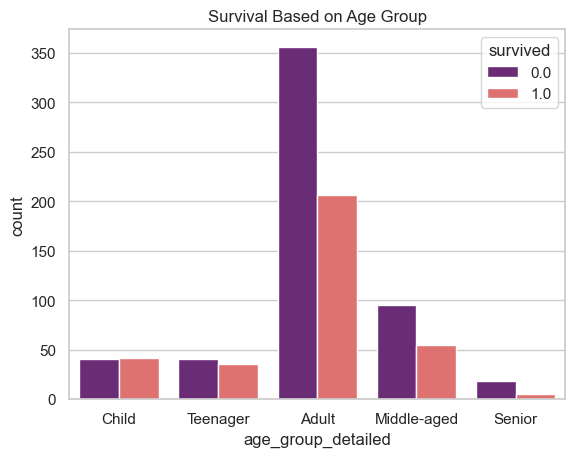

In [61]:
# Age group (detailed)
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_data_filled['age_group_detailed'] = pd.cut(titanic_data_filled['age'], bins=bins, labels=labels)
sns.countplot(x='age_group_detailed', hue='survived', data=titanic_data_filled, palette='magma')
plt.title('Survival Based on Age Group')
plt.show()

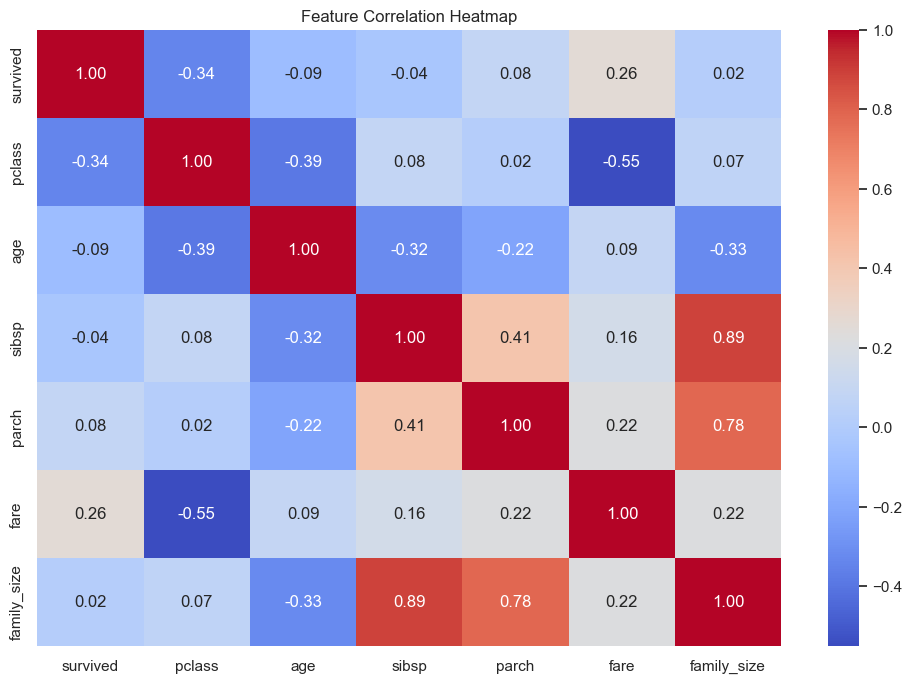

In [62]:
# Correlation heatmap
plt.figure(figsize=(12,8))
numeric_features = titanic_data_filled.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

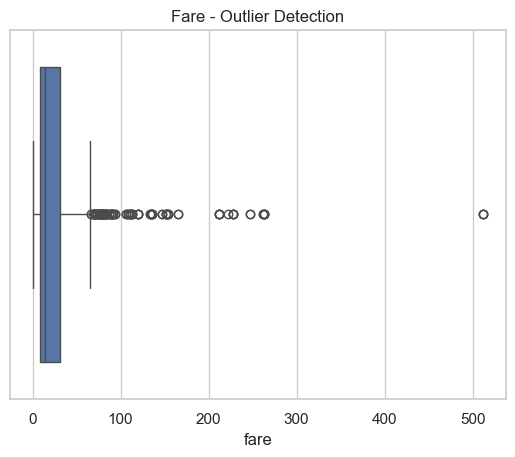

In [63]:
# Boxplot for Fare
sns.boxplot(x=titanic_data_filled['fare'])
plt.title('Fare - Outlier Detection')
plt.show()

In [64]:
# Detect outliers using IQR
Q1 = titanic_data_filled['fare'].quantile(0.25)
Q3 = titanic_data_filled['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = titanic_data_filled[(titanic_data_filled['fare'] < lower_bound) | 
                               (titanic_data_filled['fare'] > upper_bound)]
print(f"\nOutliers in 'fare': {outliers.shape[0]} detected.")
print(outliers[['fare', 'pclass', 'survived']].head())


Outliers in 'fare': 116 detected.
        fare  pclass  survived
1    71.2833     1.0       1.0
27  263.0000     1.0       0.0
31  146.5208     1.0       1.0
34   82.1708     1.0       0.0
52   76.7292     1.0       1.0
